In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Read in the Ratings.csv file
data_df = pd.read_csv("Hawaii Tourism Data (from DBEDT Data Warehouse).csv")

In [3]:
# Create a DataFrame from the provided data
data = {
    "Months": ["1-Jan", "1-Feb", "1-Mar", "1-Apr", "1-May", "1-Jun", "1-Jul", "1-Aug", "1-Sep", "1-Oct", "1-Nov", "1-Dec",
               "1-Jan", "1-Feb", "1-Mar", "1-Apr", "1-May", "1-Jun", "1-Jul", "1-Aug", "1-Sep", "1-Oct", "1-Nov", "1-Dec",
               "1-Jan", "1-Feb", "1-Mar", "1-Apr", "1-May", "1-Jun", "1-Jul", "1-Aug", "1-Sep", "1-Oct", "1-Nov", "1-Dec",
               "1-Jan", "1-Feb", "1-Mar", "1-Apr", "1-May", "1-Jun", "1-Jul", "1-Aug", "1-Sep", "23-Oct", "23-Nov", "23-Dec"],
    "Visitor Arrivals": [39492, 42347, 19721, 185, 300, 553, 628, 758, 528, 6784, 17626, 1787,
                         1640, 3243, 6445, 22708, 35080, 54697, 62534, 53301, 40106, 41282, 47322, 46703,
                         33303, 38284, 47324, 60295, 50221, 60991, 66262, 57157, 47762, 47304, 47973, 52194,
                         39055, 39196, 46992, 55216, 46408, 57521, 62068, 58441, 48282, 45061, 47108, 51005]
}

In [4]:
busy_mths_df = pd.DataFrame(data)

# Convert the "Months" column to datetime format
busy_mths_df['Months'] = pd.to_datetime(busy_mths_df['Months'], format='%d-%b')

# Group by month and calculate the mean visitor arrivals for each month
monthly_avg = busy_mths_df.groupby(busy_mths_df['Months'].dt.month).mean()

# Identify the slowest month
slowest_month = monthly_avg.idxmin()['Visitor Arrivals']

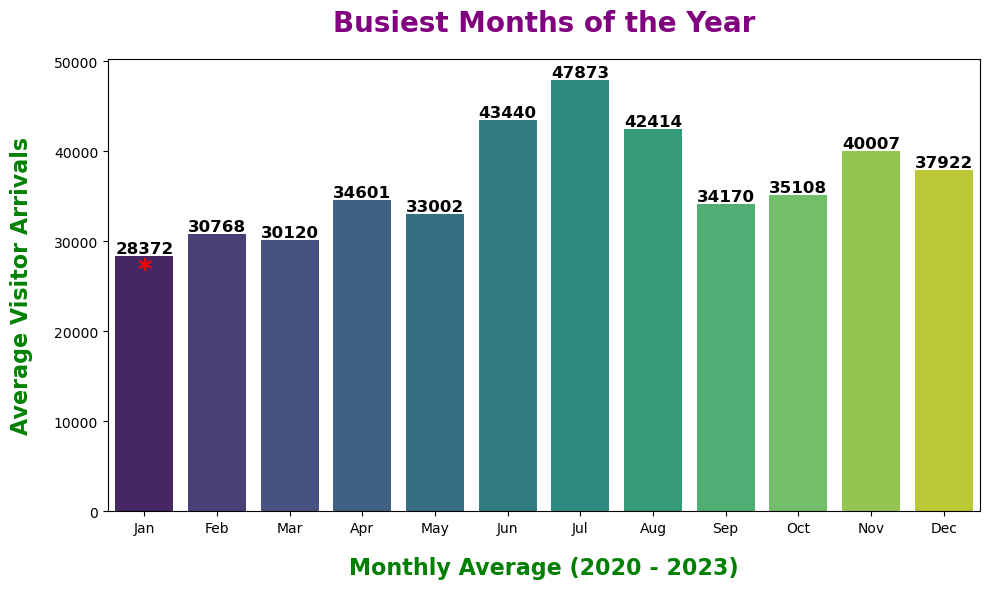

In [5]:
# Plot using seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x=monthly_avg.index, y="Visitor Arrivals", data=monthly_avg, palette="viridis")
plt.title("Busiest Months of the Year", fontdict={'fontweight': 'bold', 'fontsize': 20, 'color': 'purple'}, pad=20)
plt.xlabel("Monthly Average (2020 - 2023)", fontdict={'fontweight': 'bold', 'fontsize': 16, 'color': 'green'}, labelpad=15)
plt.ylabel("Average Visitor Arrivals", fontdict={'fontweight': 'bold', 'fontsize': 16, 'color': 'green'}, labelpad=15)
plt.xticks(range(0, 12), labels=["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])
# Annotate each bar with its corresponding average value
for index, value in enumerate(monthly_avg["Visitor Arrivals"]):
    if monthly_avg.index[index] == slowest_month:
        plt.text(index, value, f'{value:.0f}', ha='center', va='bottom', fontdict={'fontweight': 'bold', 'fontsize': 12, 'color': 'black'})
        plt.text(index, value, '*', ha='center', va='top', fontdict={'fontweight': 'bold', 'fontsize': 20, 'color': 'red'})
    else:
        plt.text(index, value, f'{value:.0f}', ha='center', va='bottom', fontdict={'fontweight': 'bold', 'fontsize': 12, 'color': 'black'})

plt.tight_layout()

# Save the chart as an image file
plt.savefig('visitor_arrivals_chart.png', dpi=300)
plt.show()